### Testing Model Assumptions Example 2.14
With **Python**, the first, third and fourth figures can easily be plotted using the **seaborn.residplot()** and **seaborn.regplot()** to create the plots, and the information provided by the different attributes of **OLSResults.get\_influence()**. Unfortunately, **Seaborn** does not have an explicit function to plot the qq-plot. Therefore, we will use the function **ProbPlot()** provided by **statsmodels.graphics.gofplots**.

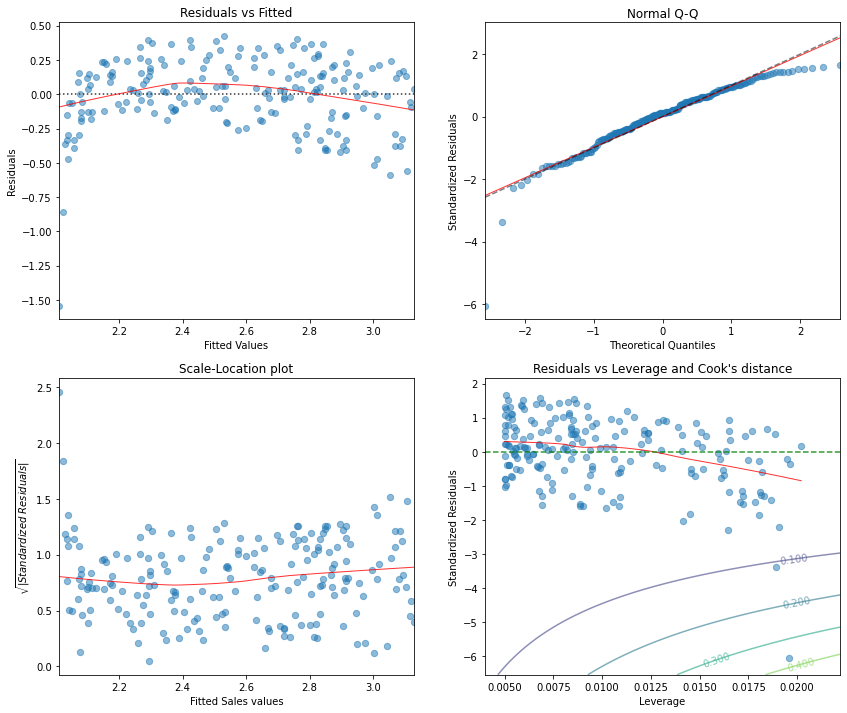

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
from TMA_def import *

# Read data
df = pd.read_csv('./data/Advertising.csv')
x = df['TV']
y = df['sales']

# Reformat Data
dataframe = pd.concat([x, y], axis=1)


""" Find Predictions, Residuals and Influence on the Residuals """
# Fit Linear Model
x_sm = sm.add_constant(x)
model = sm.OLS(np.log(y), x_sm).fit()

# Find the predicted values for the original design.
yfit = model.fittedvalues
# Find the Residuals
res = model.resid
# Influence of the Residuals
res_inf = model.get_influence()
# Studentized residuals using variance from OLS
res_standard = res_inf.resid_studentized_internal
# Absolute square root Residuals:
res_stand_sqrt = np.sqrt(np.abs(res_standard))
# Cook's Distance and leverage:
res_inf_cooks = res_inf.cooks_distance
res_inf_leverage = res_inf.hat_matrix_diag


""" Plots """
# Create Figure and subplots
fig = plt.figure(figsize = (14,12))

# First subplot Residuals vs Fitted values
ax1 = fig.add_subplot(2, 2, 1)
plot_residuals(ax1, yfit, res)

# Second subplot Q-Q Plot
ax2 = fig.add_subplot(2, 2, 2)
plot_QQ(ax2, res_standard)

# Third subplot: Scale location
ax3 = fig.add_subplot(2, 2, 3)
plot_scale_loc(ax3, yfit, res_stand_sqrt, x_lab='Fitted Sales values')

# Fourth subplot: Cook's distance
ax4 = fig.add_subplot(2, 2, 4)

sns.regplot(x=res_inf_leverage, y=res_standard, 
            scatter=True, ci=False, lowess=True, 
            scatter_kws={'s': 40, 'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

x_min, x_max = min(res_inf_leverage) - 0.001, max(res_inf_leverage) + 0.002
y_min, y_max = min(res_standard) - 0.5, max(res_standard) + 0.5
# Plot centre line
plt.plot((x_min, x_max), (0, 0), 'g--', alpha=0.8)
# Plot contour lines for Cook's Distance levels
n = 100
n_pred = 1 # Number of predictors
cooks_distance = np.zeros((n, n))
x_cooks = np.linspace(x_min, x_max, n)
y_cooks = np.linspace(y_min, y_max, n)

for xi in range(n):
    for yi in range(n):
        cooks_distance[yi][xi] = \
        y_cooks[yi]**2 * x_cooks[xi] / (1 - x_cooks[xi]) / (n_pred + 1)
CS = ax4.contour(x_cooks, y_cooks, cooks_distance, levels=4, alpha=0.6)

ax4.clabel(CS, inline=0,  fontsize=10)
ax4.set_xlim(x_min, x_max)
ax4.set_ylim(y_min, y_max)
ax4.set_title('Residuals vs Leverage and Cook\'s distance')
ax4.set_xlabel('Leverage')
ax4.set_ylabel('Standardized Residuals')

# Show plot
# plt.tight_layout()
plt.show()